In [7]:
import os
import tarfile
import zipfile

DOWNLOAD_ROOT = "/home/gcullen/Downloads/nlp-getting-started"
PATH_TO_ZIP = "/home/gcullen/Downloads/nlp-getting-started.zip"

def fetch_data(download_path=DOWNLOAD_ROOT, path_to_zip_file=PATH_TO_ZIP): 
    os.makedirs(download_path, exist_ok=True)
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(download_path)

In [8]:
fetch_data()

import pandas as pd
import numpy as np

path=DOWNLOAD_ROOT

def load_data(trainOrTest):
    if trainOrTest == 'Test':
        csv_path = os.path.join(path, "train.csv")
        return pd.read_csv(csv_path)
    else:
        csv_path = os.path.join(path, "train.csv")
        return pd.read_csv(csv_path)

In [9]:
data = load_data('Train')
dataTest = load_data('Test')

In [10]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [12]:

def vectorize(X):
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(X)
    return x.toarray()

labels = data['target']

X = vectorize(data['text'])
X_test = vectorize(dataTest['text'])

labels_test = dataTest['target']

In [13]:
#THIS IS A CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=420)

print('Parameters currently in use:\n')
print(forest_clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 420, 'verbose': 0, 'warm_start': False}


In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X, labels, cv=3, method="predict_proba")

y_probas_forest

In [ ]:
y_scores_forest = y_probas_forest[:, 1]


In [ ]:
y_scores_forest

In [ ]:
#TUNING HYPERPARAMETERS, POG
#first create the parameters
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

forest_clf_random = RandomizedSearchCV(estimator = forest_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest_clf.fit(X, labels)

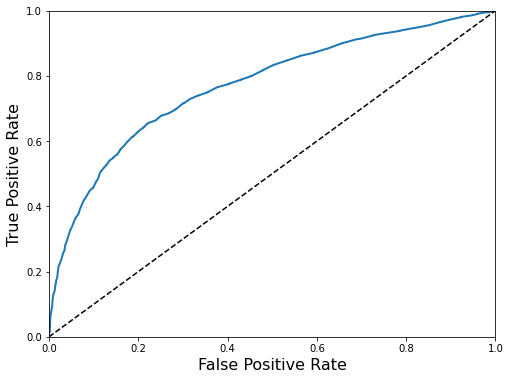

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

fpr_forest, tpr_forest, thresholds_forest = roc_curve(labels, y_scores_forest)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()


In [43]:
#accuracy, actually is not that bad
roc_auc_score(labels, y_scores_forest)

0.7708645099566406

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X, labels, cv=3, scoring="accuracy")

array([0.70843184, 0.67454689, 0.73512022])

In [47]:
#attempting another classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
neigh.predict(some_X)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [51]:
list(some_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [53]:
#wow this classifier did bad :(
cross_val_score(neigh, X, labels, cv=3, scoring="accuracy")

array([0.61347518, 0.59259259, 0.60346866])